In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# SciPy

In [2]:
tv_hours = [3,5,2,0,5,3,1,4,3,4]
GPA = [2.7,2.1,3.3,3.4,2.0,3.0,3.6,2.8,3.5,2.6]

In [3]:
# Pearson correlation coefficient
stats.pearsonr(tv_hours, GPA)

(-0.8569780755138501, 0.001534743626999713)

In [6]:
# Spearman correlation coefficient
stats.spearmanr(tv_hours, GPA)

SpearmanrResult(correlation=-0.8643457510060754, pvalue=0.0012537299375704556)

In [8]:
# Kendall's tau, a correlation measure for ordinal data
stats.kendalltau(tv_hours,GPA)

KendalltauResult(correlation=-0.7542472332656507, pvalue=0.0033968772424454747)

# Numpy

In [13]:
np.cov(tv_hours, GPA)

array([[ 2.66666667, -0.78888889],
       [-0.78888889,  0.31777778]])

In [12]:
np.corrcoef(tv_hours, GPA)

array([[ 1.        , -0.85697808],
       [-0.85697808,  1.        ]])

# Pandas

In [15]:
df = sns.load_dataset("car_crashes")
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [17]:
df.dtypes

total             float64
speeding          float64
alcohol           float64
not_distracted    float64
no_previous       float64
ins_premium       float64
ins_losses        float64
abbrev             object
dtype: object

In [23]:
df.corr()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


In [24]:
df.cov()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,16.990902,5.086338,6.076992,15.381048,14.837975,-146.768484,-3.686589
speeding,5.086338,4.071303,2.336617,5.349704,4.344815,-27.943987,-3.303815
alcohol,6.076992,2.336617,2.989901,5.713491,5.100416,-52.599326,-4.833276
not_distracted,15.381048,5.349704,5.713491,20.330874,12.685394,-140.572871,-8.507441
no_previous,14.837975,4.344815,5.100416,12.685394,14.172755,-105.312296,-0.594528
ins_premium,-146.768484,-27.943987,-52.599326,-140.572871,-105.312296,31789.565170,2759.254746
ins_losses,-3.686589,-3.303815,-4.833276,-8.507441,-0.594528,2759.254746,616.823046


In [51]:
df["total"].corr(df["no_previous"])

0.956179174572308

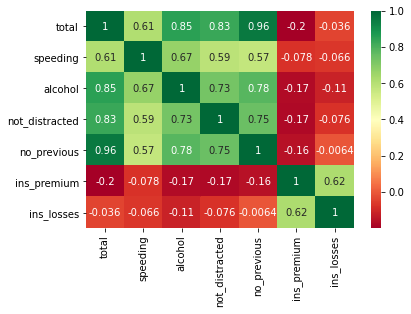

In [32]:
sns.heatmap(df.corr(),annot= True, cmap="RdYlGn");

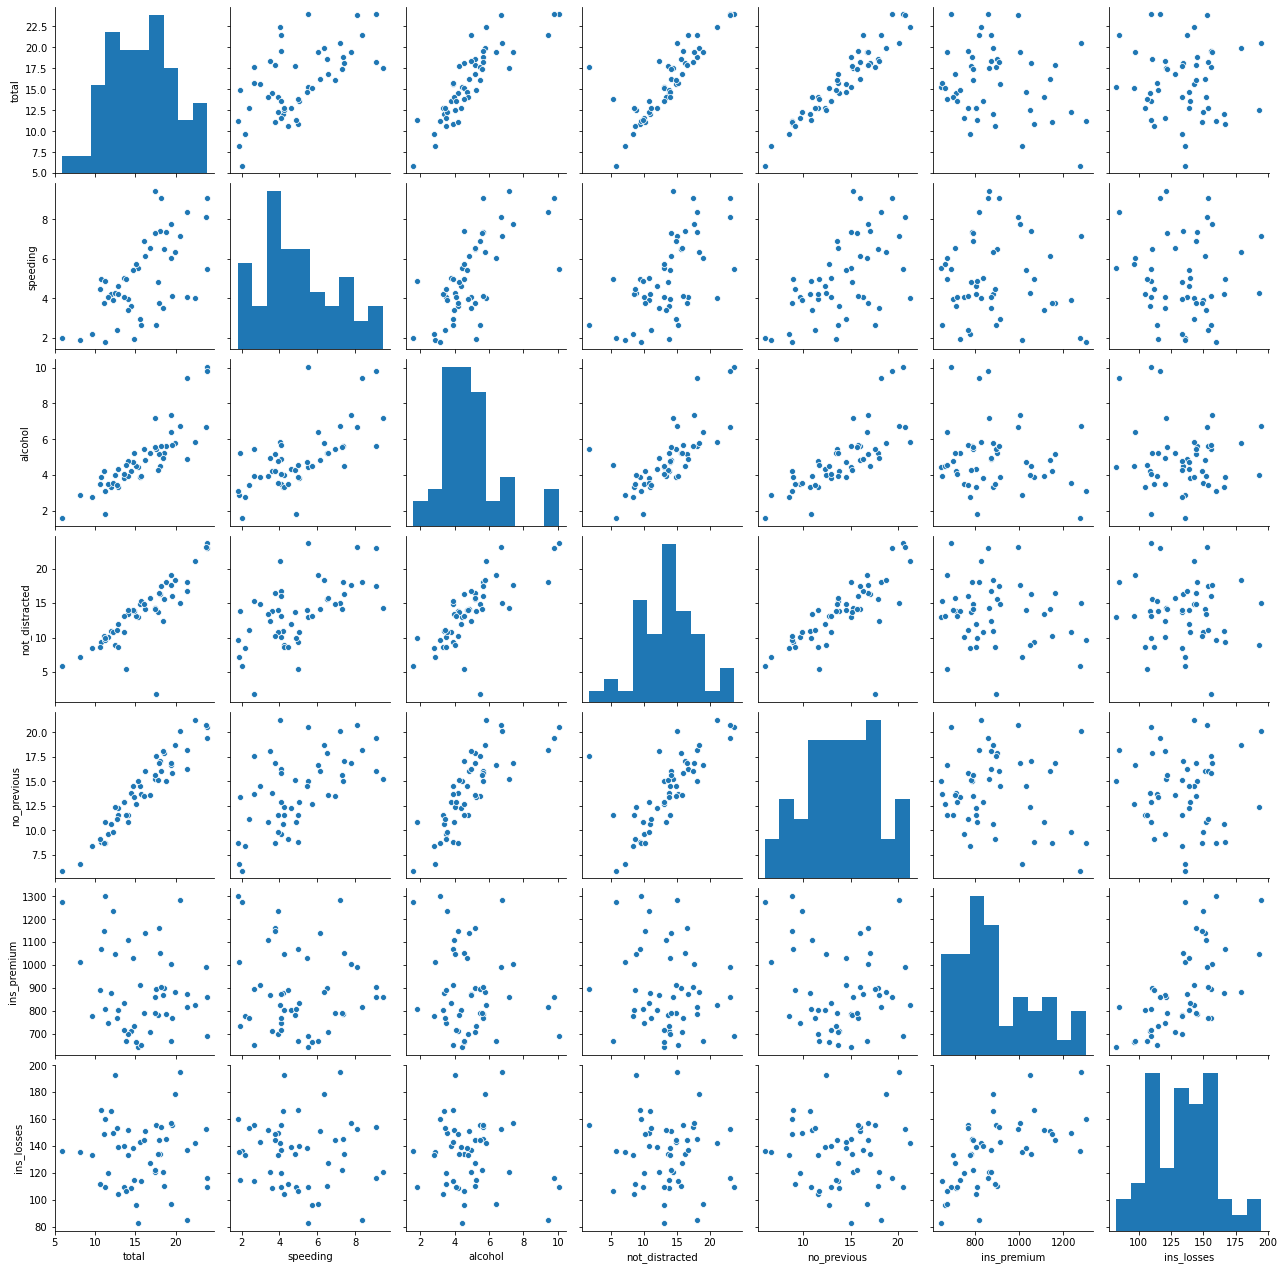

In [35]:
sns.pairplot(df)

# Linear Regression

In [40]:
stats.linregress(df["total"],df["no_previous"])

LinregressResult(slope=0.8732894144040177, intercept=0.21547126628322744, rvalue=0.9561791745723079, pvalue=8.58968434757754e-28, stderr=0.038200185139383024)

In [41]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(df["total"],df["no_previous"])

In [42]:
slope

0.8732894144040177

In [43]:
intercept

0.21547126628322744

In [44]:
rvalue

0.9561791745723079

In [45]:
pvalue

8.58968434757754e-28

In [46]:
stderr

0.038200185139383024

In [60]:
R_squared = rvalue ** 2
R_squared

0.9142786138857801

In [67]:
intercept = stats.linregress(tv_hours,GPA).intercept
slope = stats.linregress(tv_hours,GPA).slope

In [68]:
tv_hours

[3, 5, 2, 0, 5, 3, 1, 4, 3, 4]

In [69]:
GPA

[2.7, 2.1, 3.3, 3.4, 2.0, 3.0, 3.6, 2.8, 3.5, 2.6]

In [70]:
x_p = np.array([0,1,2,3,4,5])
y_p = intercept + slope * x_p
y_p

array([3.7875    , 3.49166667, 3.19583333, 2.9       , 2.60416667,
       2.30833333])

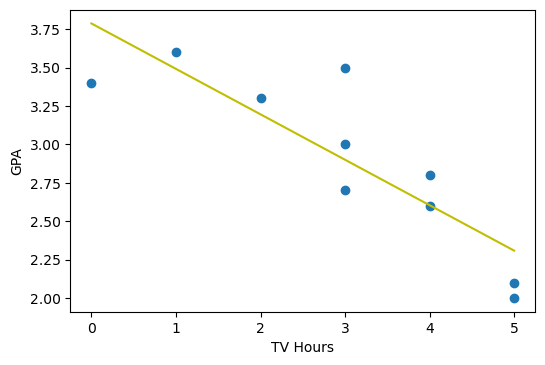

In [80]:
plt.figure(dpi=100)
ax = plt.axes()
ax.scatter(tv_hours,GPA)
ax.plot(x_p,y_p, "y")
ax.set_xlabel("TV Hours")
ax.set_ylabel("GPA");